In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import xgboost as xgb

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(10)

,Id,LandContour,GarageYrBlt,FullBath,1stFlrSF,BsmtFinSF1,TotRmsAbvGrd,ExterQual,OpenPorchSF,Heating,...,GarageCars,KitchenQual,KitchenAbvGr,GrLivArea,2ndFlrSF,CentralAir,BsmtQual,TotalBsmtSF,Fireplaces,SalePrice
0,1,Lvl,2003.0,2,856,706,8,Gd,61,GasA,...,2,Gd,1,1710,854,Y,Gd,856,0,208500
1,2,Lvl,1976.0,2,1262,978,6,TA,0,GasA,...,2,TA,1,1262,0,Y,Gd,1262,1,181500
2,3,Lvl,2001.0,2,920,486,6,Gd,42,GasA,...,2,Gd,1,1786,866,Y,Gd,920,1,223500
3,4,Lvl,1998.0,1,961,216,7,TA,35,GasA,...,3,Gd,1,1717,756,Y,TA,756,1,140000
4,5,Lvl,2000.0,2,1145,655,9,Gd,84,GasA,...,3,Gd,1,2198,1053,Y,Gd,1145,1,250000
5,6,Lvl,1993.0,1,796,732,5,TA,30,GasA,...,2,TA,1,1362,566,Y,Gd,796,0,143000
6,7,Lvl,2004.0,2,1694,1369,7,Gd,57,GasA,...,2,Gd,1,1694,0,Y,Ex,1686,1,307000
7,8,Lvl,1973.0,2,1107,859,7,TA,204,GasA,...,2,TA,1,2090,983,Y,Gd,1107,2,200000
8,9,Lvl,1931.0,2,1022,0,8,TA,0,GasA,...,2,TA,2,1774,752,Y,TA,952,2,129900
9,10,Lvl,1939.0,1,1077,851,5,TA,4,GasA,...,1,TA,2,1077,0,Y,TA,991,2,118000


In [48]:
print("The train data size is : {} ".format(train.shape))
print("The test data size is : {} ".format(test.shape))

train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

The train data size is : (1460, 22) 
The test data size is : (1459, 21) 


In [49]:
train.head(10)

,LandContour,GarageYrBlt,FullBath,1stFlrSF,BsmtFinSF1,TotRmsAbvGrd,ExterQual,OpenPorchSF,Heating,Condition2,...,GarageCars,KitchenQual,KitchenAbvGr,GrLivArea,2ndFlrSF,CentralAir,BsmtQual,TotalBsmtSF,Fireplaces,SalePrice
0,Lvl,2003.0,2,856,706,8,Gd,61,GasA,Norm,...,2,Gd,1,1710,854,Y,Gd,856,0,208500
1,Lvl,1976.0,2,1262,978,6,TA,0,GasA,Norm,...,2,TA,1,1262,0,Y,Gd,1262,1,181500
2,Lvl,2001.0,2,920,486,6,Gd,42,GasA,Norm,...,2,Gd,1,1786,866,Y,Gd,920,1,223500
3,Lvl,1998.0,1,961,216,7,TA,35,GasA,Norm,...,3,Gd,1,1717,756,Y,TA,756,1,140000
4,Lvl,2000.0,2,1145,655,9,Gd,84,GasA,Norm,...,3,Gd,1,2198,1053,Y,Gd,1145,1,250000
5,Lvl,1993.0,1,796,732,5,TA,30,GasA,Norm,...,2,TA,1,1362,566,Y,Gd,796,0,143000
6,Lvl,2004.0,2,1694,1369,7,Gd,57,GasA,Norm,...,2,Gd,1,1694,0,Y,Ex,1686,1,307000
7,Lvl,1973.0,2,1107,859,7,TA,204,GasA,Norm,...,2,TA,1,2090,983,Y,Gd,1107,2,200000
8,Lvl,1931.0,2,1022,0,8,TA,0,GasA,Norm,...,2,TA,2,1774,752,Y,TA,952,2,129900
9,Lvl,1939.0,1,1077,851,5,TA,4,GasA,Artery,...,1,TA,2,1077,0,Y,TA,991,2,118000


In [50]:
test.head(10)

,LandContour,GarageYrBlt,FullBath,1stFlrSF,BsmtFinSF1,TotRmsAbvGrd,ExterQual,OpenPorchSF,Heating,Condition2,OverallQual,GarageCars,KitchenQual,KitchenAbvGr,GrLivArea,2ndFlrSF,CentralAir,BsmtQual,TotalBsmtSF,Fireplaces
0,Lvl,1961.0,1,896,468.0,5,TA,0,GasA,Norm,5,1.0,TA,1,896,0,Y,TA,882.0,0
1,Lvl,1958.0,1,1329,923.0,6,TA,36,GasA,Norm,6,1.0,Gd,1,1329,0,Y,TA,1329.0,0
2,Lvl,1997.0,2,928,791.0,6,TA,34,GasA,Norm,5,2.0,TA,1,1629,701,Y,Gd,928.0,1
3,Lvl,1998.0,2,926,602.0,7,TA,36,GasA,Norm,6,2.0,Gd,1,1604,678,Y,TA,926.0,1
4,HLS,1992.0,2,1280,263.0,5,Gd,82,GasA,Norm,8,2.0,Gd,1,1280,0,Y,Gd,1280.0,0
5,Lvl,1993.0,2,763,0.0,7,TA,84,GasA,Norm,6,2.0,TA,1,1655,892,Y,Gd,763.0,1
6,Lvl,1992.0,2,1187,935.0,6,TA,21,GasA,Norm,6,2.0,TA,1,1187,0,Y,Gd,1168.0,0
7,Lvl,1998.0,2,789,0.0,7,TA,75,GasA,Norm,6,2.0,TA,1,1465,676,Y,Gd,789.0,1
8,Lvl,1990.0,1,1341,637.0,5,TA,0,GasA,Norm,7,2.0,Gd,1,1341,0,Y,Gd,1300.0,1
9,Lvl,1970.0,1,882,804.0,4,TA,0,GasA,Norm,4,2.0,TA,1,882,0,Y,TA,882.0,0


In [51]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<ipython-input-52-38332a88f2ec>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'] , fit=stats.norm);


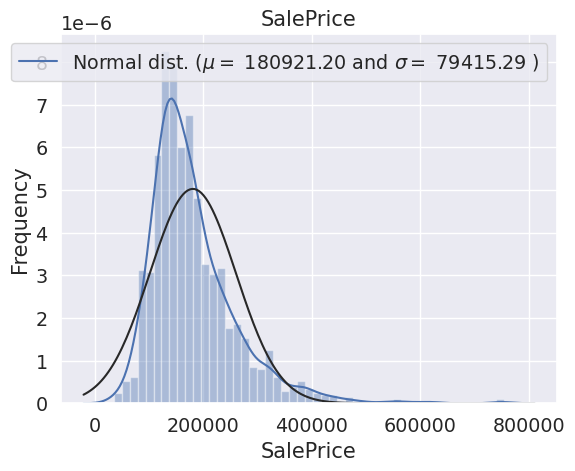

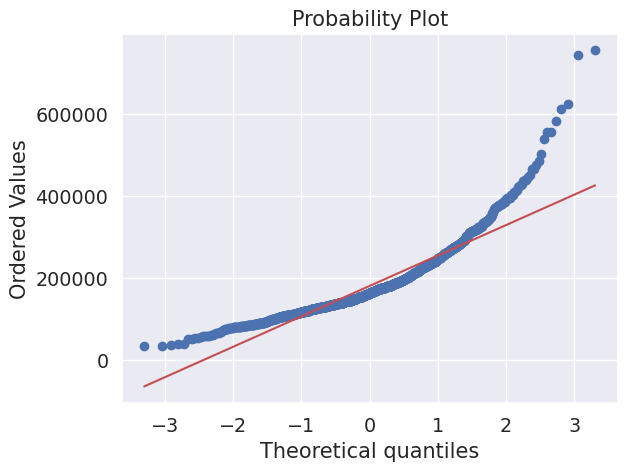

Skewness: 1.882876
Kurtosis: 6.536282


In [52]:
#Plot Histogram

sns.distplot(train['SalePrice'] , fit=stats.norm);

(mu, sigma) = stats.norm.fit(train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

In [53]:
#Check types of Features

categorial = train.select_dtypes(include=['object']).columns
numerical = train.select_dtypes(include=['int64','float64']).columns
print(len(categorial), 'categorical', 'and', len(numerical), 'numerical',)

7 categorical and 14 numerical


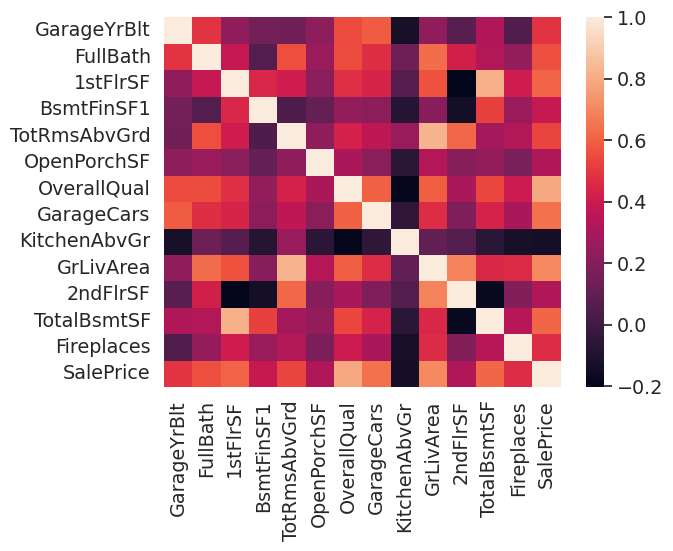

In [54]:
#Matrix of correlation

#We need to use numerical features
df = pd.DataFrame(train, columns=numerical)
corrmatrix = df.corr()
sns.heatmap(corrmatrix);

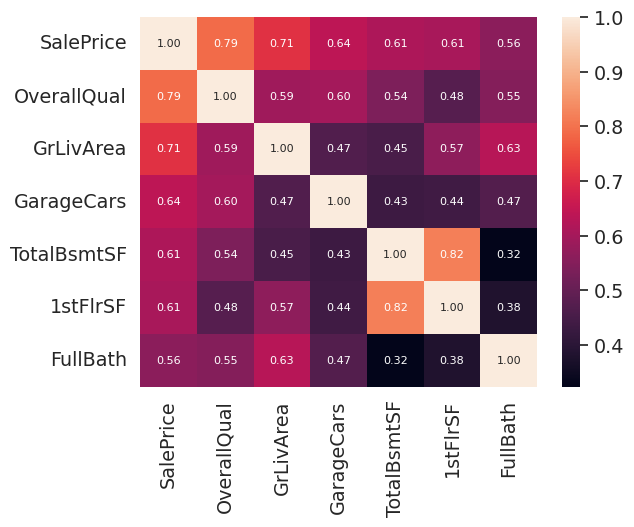

In [55]:
#Filter Feature
k = 7 #number of variables for heatmap
cols = corrmatrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

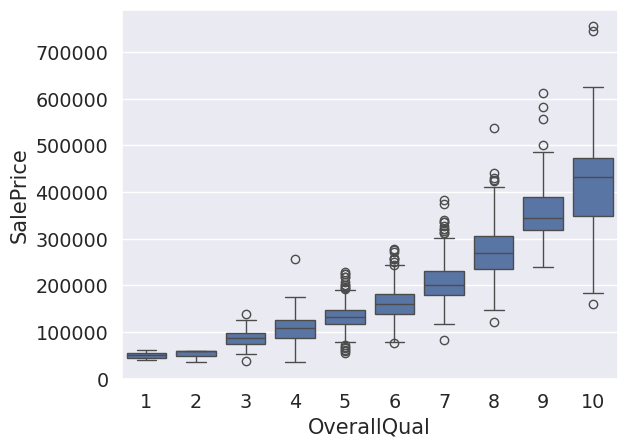

In [56]:
#let's look at the most correlating feature
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
sns.boxplot(x='OverallQual', y="SalePrice", data=data)

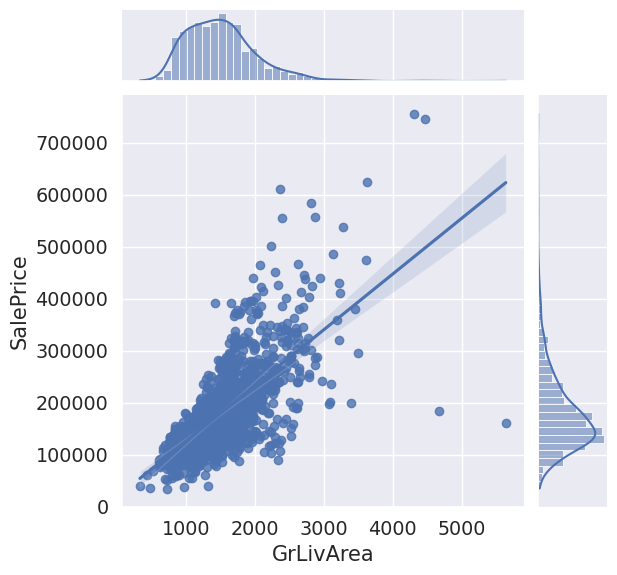

In [57]:
sns.jointplot(
    x=train['GrLivArea'],
    y=train['SalePrice'],
    palette='bright',
    kind='reg');

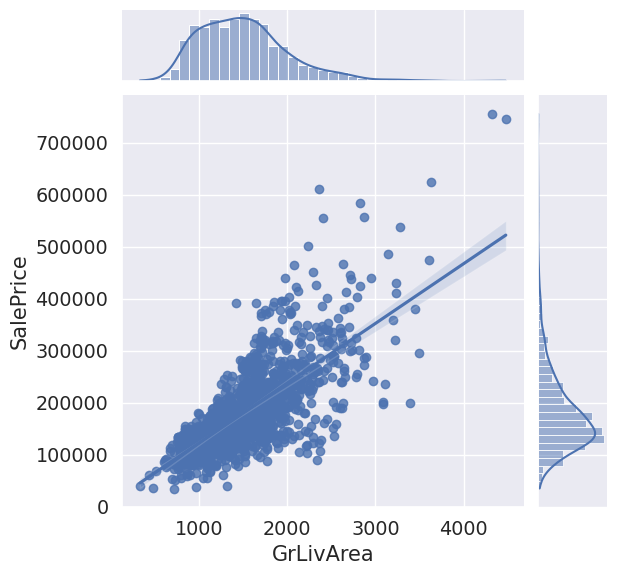

In [58]:
#removing the two dots that stand out
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<250000)].index).reset_index(drop=True)
sns.jointplot(
    x=train['GrLivArea'],
    y=train['SalePrice'],
    palette='bright',
    kind='reg');

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

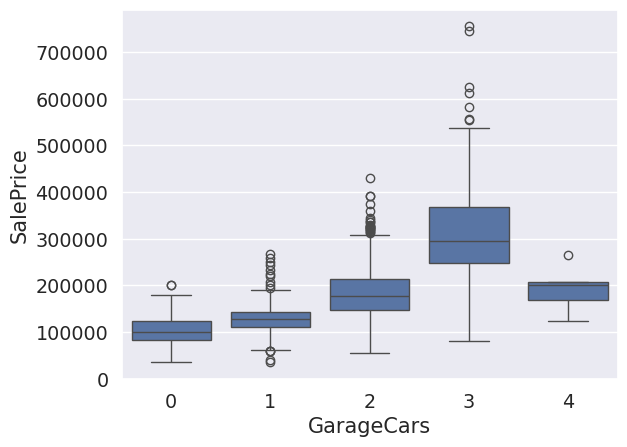

In [59]:
sns.boxplot(x=train['GarageCars'], y=train['SalePrice'])

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

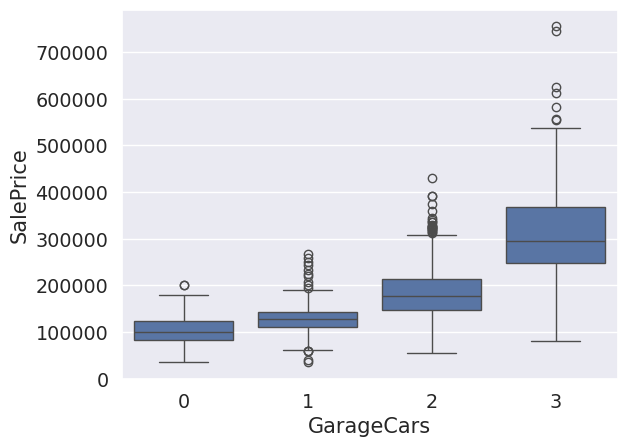

In [60]:
#It is necessary to remove houses with 4 garages
train = train.drop(train[(train['GarageCars']>3) & (train['SalePrice']<300000)].index).reset_index(drop=True)
sns.boxplot(x=train['GarageCars'], y=train['SalePrice'])

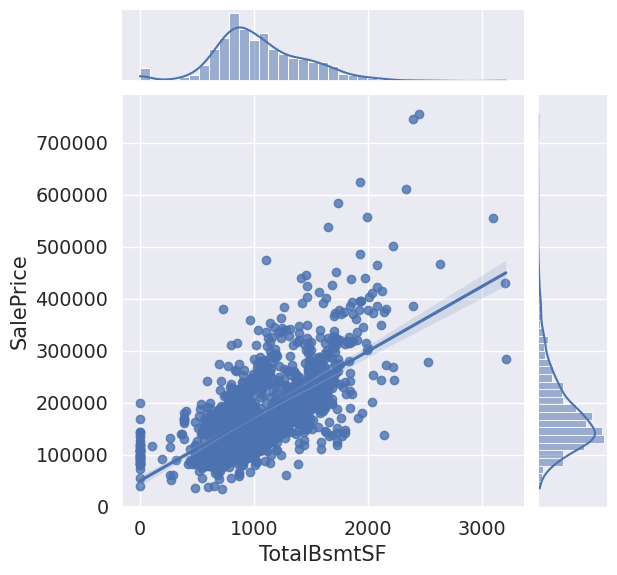

In [61]:
sns.jointplot(x=train['TotalBsmtSF'], y=train['SalePrice'], kind='reg')

#nothing need to do

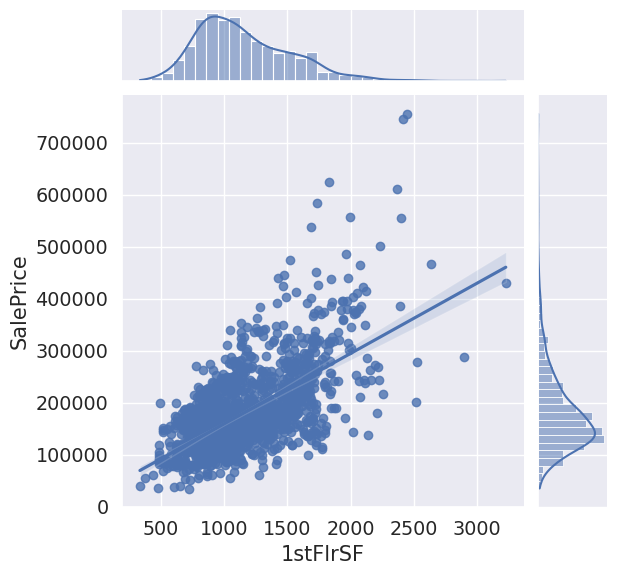

In [62]:
sns.jointplot(x=train['1stFlrSF'], y=train['SalePrice'], kind='reg')

#nothing need to do

<Axes: xlabel='FullBath', ylabel='SalePrice'>

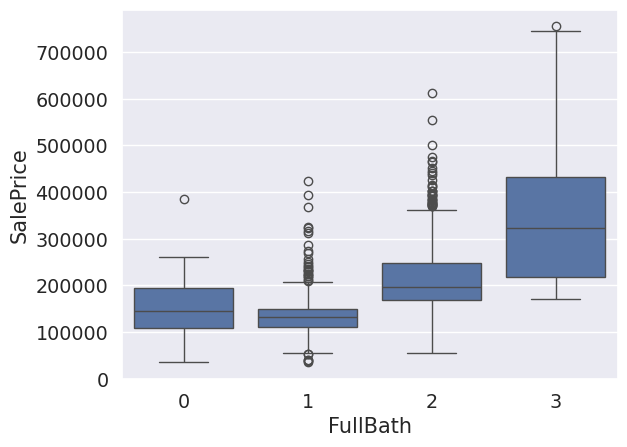

In [63]:
sns.boxplot(x=train['FullBath'], y=train['SalePrice'])

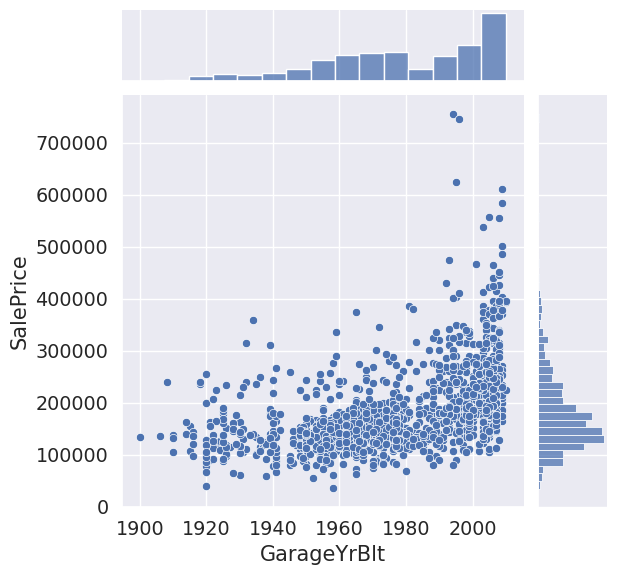

In [64]:
sns.jointplot(x=train['GarageYrBlt'], y=train['SalePrice'])

In [65]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("Train data size is : {}".format(train.shape))
print("Test data size is : {}".format(test.shape))
print("Combined dataset size is : {}".format(all_data.shape))
# Find Missing Ratio of Dataset
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

Train data size is : (1453, 21)
Test data size is : (1459, 20)
Combined dataset size is : (2912, 20)


,Missing Ratio
GarageYrBlt,5.460165
BsmtQual,2.781593
BsmtFinSF1,0.034341
GarageCars,0.034341
KitchenQual,0.034341
TotalBsmtSF,0.034341


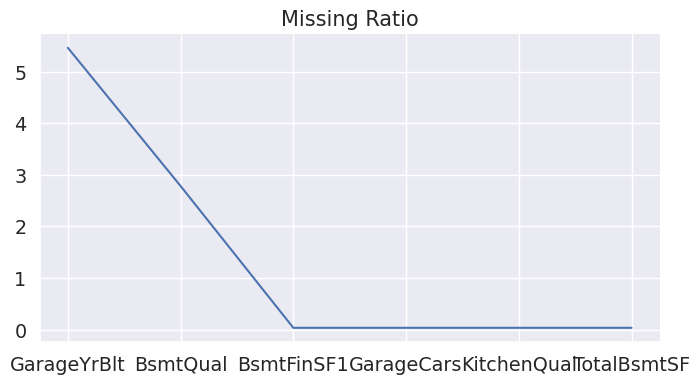

In [66]:
# @title Missing Ratio

missing_data['Missing Ratio'].plot(kind='line', figsize=(8, 4), title='Missing Ratio')
plt.gca().spines[['top', 'right']].set_visible(False)

Text(0.5, 1.0, 'Percent missing data by feature')

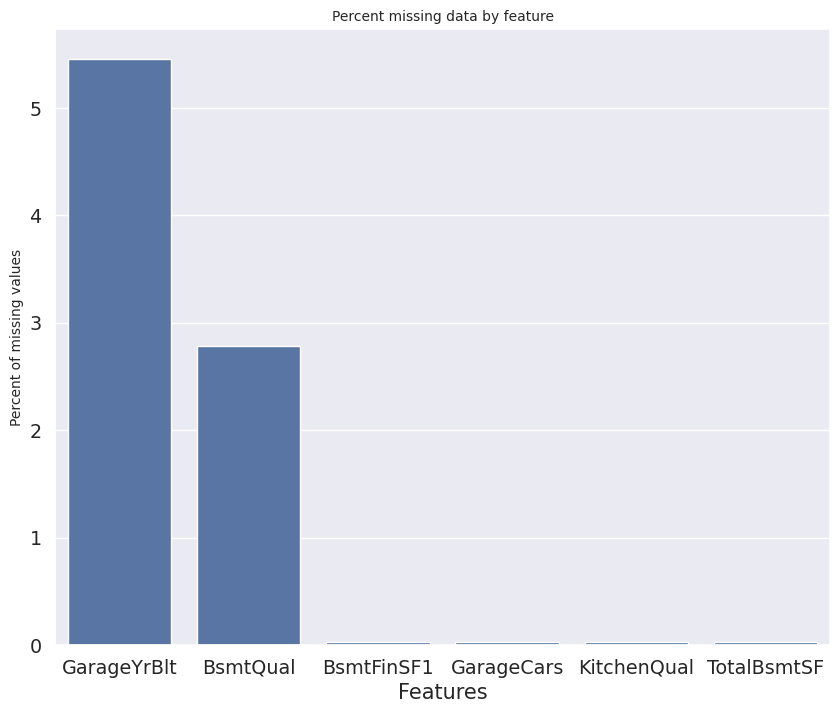

In [67]:
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=10)
plt.title('Percent missing data by feature', fontsize=10)

In [68]:
#Fill missing data
all_data["GarageYrBlt"] = all_data["GarageYrBlt"].fillna(0)
all_data["BsmtQual"] = all_data["BsmtQual"].fillna("None")
all_data["BsmtFinSF1"] = all_data["BsmtFinSF1"].fillna(0)
all_data["GarageCars"] = all_data["GarageCars"].fillna(0)
all_data["KitchenQual"] = all_data["KitchenQual"].fillna(all_data["KitchenQual"].mode()[0])
all_data["TotalBsmtSF"] = all_data["TotalBsmtSF"].fillna(0)

In [69]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [70]:
#Feature engineering

#Encode categorial features
from sklearn.preprocessing import LabelEncoder

feat = ('LandContour', 'ExterQual', 'Heating', 'Condition2', 'KitchenQual', 'CentralAir', 'BsmtQual')
for i in feat:
  lbl = LabelEncoder()
  lbl.fit(list(all_data[i].values))
  all_data[i] = lbl.transform(list(all_data[i].values))

train.head(10)


,LandContour,GarageYrBlt,FullBath,1stFlrSF,BsmtFinSF1,TotRmsAbvGrd,ExterQual,OpenPorchSF,Heating,Condition2,...,GarageCars,KitchenQual,KitchenAbvGr,GrLivArea,2ndFlrSF,CentralAir,BsmtQual,TotalBsmtSF,Fireplaces,SalePrice
0,Lvl,2003.0,2,856,706,8,Gd,61,GasA,Norm,...,2,Gd,1,1710,854,Y,Gd,856,0,208500
1,Lvl,1976.0,2,1262,978,6,TA,0,GasA,Norm,...,2,TA,1,1262,0,Y,Gd,1262,1,181500
2,Lvl,2001.0,2,920,486,6,Gd,42,GasA,Norm,...,2,Gd,1,1786,866,Y,Gd,920,1,223500
3,Lvl,1998.0,1,961,216,7,TA,35,GasA,Norm,...,3,Gd,1,1717,756,Y,TA,756,1,140000
4,Lvl,2000.0,2,1145,655,9,Gd,84,GasA,Norm,...,3,Gd,1,2198,1053,Y,Gd,1145,1,250000
5,Lvl,1993.0,1,796,732,5,TA,30,GasA,Norm,...,2,TA,1,1362,566,Y,Gd,796,0,143000
6,Lvl,2004.0,2,1694,1369,7,Gd,57,GasA,Norm,...,2,Gd,1,1694,0,Y,Ex,1686,1,307000
7,Lvl,1973.0,2,1107,859,7,TA,204,GasA,Norm,...,2,TA,1,2090,983,Y,Gd,1107,2,200000
8,Lvl,1931.0,2,1022,0,8,TA,0,GasA,Norm,...,2,TA,2,1774,752,Y,TA,952,2,129900
9,Lvl,1939.0,1,1077,851,5,TA,4,GasA,Artery,...,1,TA,2,1077,0,Y,TA,991,2,118000


<ipython-input-71-5c559829a5a3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'] , fit=stats.norm);


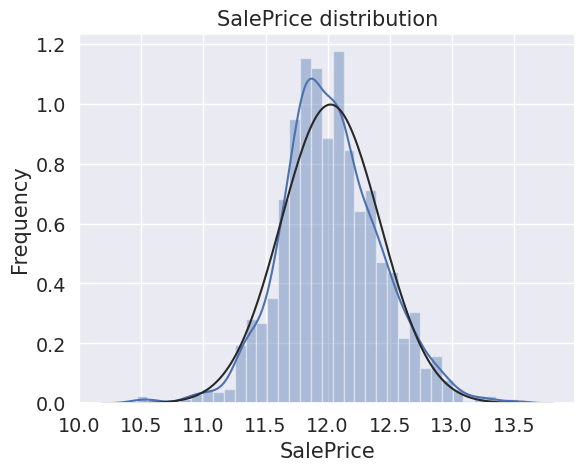

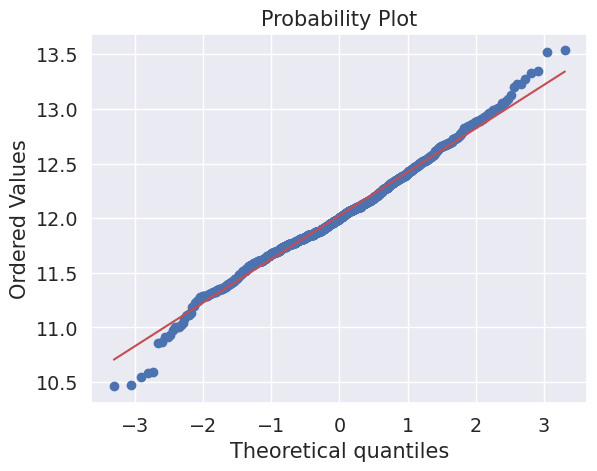

Skewness: 0.123637
Kurtosis: 0.803323


In [71]:
train['SalePrice'] = np.log1p(train['SalePrice'])

sns.distplot(train['SalePrice'] , fit=stats.norm);

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train['SalePrice'])
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

y_train = train.SalePrice.values

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())


In [72]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [73]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0,
                             learning_rate=0.05, max_depth=6,
                             min_child_weight=1.5, n_estimators=7200,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42,
                             random_state =7)

model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

print(rmsle(y_train, xgb_train_pred))

0.07790098772965863


In [76]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = xgb_pred
sub.to_csv('submission.csv',index=False)